# 자전거 대여 수요예측
----------------------

## 목차
---------------------------------
* 6.3 탐색적 데이터 분석
  * 6.3.1 캐글 노트북 환경설정
  * 6.3.2 데이터 둘러보기
  * 6.3.3 피쳐 엔지니어링
  * 6.3.4 데이터 시각화
<p>  

* 6.4 베이스라인 모델링 
  * 6.4.1 피쳐 엔지니어링
  * 6.4.2 평가지표 계산함수 작성
  * 6.4.3 모델훈련
  * 6.4.4 모델성능 검증
  * 6.4.5 예측 및 결과 검증
<p>  
  
* 6.5 성능개선 I
  * 6.5.1 하이퍼파라미터 최적화(모델훈련)
  * 6.5.2 성능검증
<p>  

* 6.6 성능개선 II  (라쏘회귀 모델)
  * 6.6.1 하이퍼파라미터 최적화(모델훈련)
  * 6.6.2 성능검증
<p>  

* 6.7 성능개선 III  (랜덤포레스트 회귀 모델)
  * 6.7.1 하이퍼파라미터 최적화(모델훈련)
  * 6.7.2 성능검증
  * 6.7.3 예측 및 결과 제출
<p>  

* 6.8 핵심요약

🔻 챕터6 전체흐름
<br>
<br><img src="./image/ch6_flow_chapter6.png" width="720">

## 6.3 탐색적 데이터 분석
----------------------


🔻베이스라인 모델 전체 프로세스
<br>
<br><img src="./image/ch6_Process_EDA.png" width="720">

### 6.3.1 캐글 노트북 환경설정
----------------------

수행사항 : 라이브러리를 일치하는 작업을 실행

### 6.3.2 데이터 둘러보기
----------------------

In [29]:
import numpy as np
import pandas as pd

data_path = './Chapter6_data/'

train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sampleSubmission.csv')

In [30]:
display(train.head())
display(test.head())
display(submission.head())

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


<br><img src="./image/ch6_feature_img.png" width="500">

수행사항 : caual,registered,datetime 피쳐제거

### 6.3.3 피쳐 엔지니어링
----------------------

수행사항 : 날짜피쳐(연,월,일,시,분,초) 추가

In [31]:
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성

# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

수행사항 : 요일피쳐 추가

In [32]:
from datetime import datetime # datatime 라이브러리 임포트
import calendar

train['weekday'] = train['date'].apply(
    lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

수행사항 : 계절,날씨 피쳐 사용개선(문자열로변환)

In [33]:
train['season'] = train['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' })
train['weather'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

### 6.3.4 데이터 시각화
----------------------

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='whitegrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### a) 분포도
-------------------------

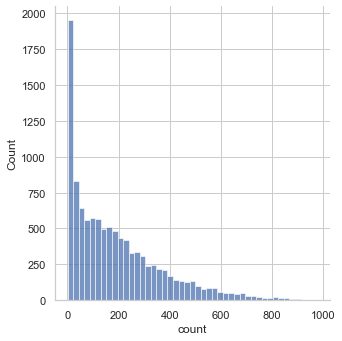

In [35]:
mpl.rc('font', size=15)      # 폰트 크기를 15로 설정 
sns.displot(train['count']); # 분포도 출력

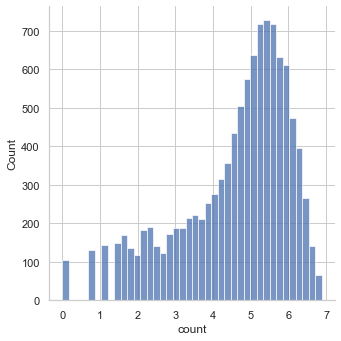

In [36]:
sns.displot(np.log(train['count']));

수행사항 : 회귀모델 성능개선을 위한 로그변환진행

<p style="color : skyblue;  font-weight:bolder">
    정리 : 타깃값분포가 정규분포에 가까울 수록 회귀모델의 성능이 상승함
</p>    

#### b) 막대그래프
-------------------------

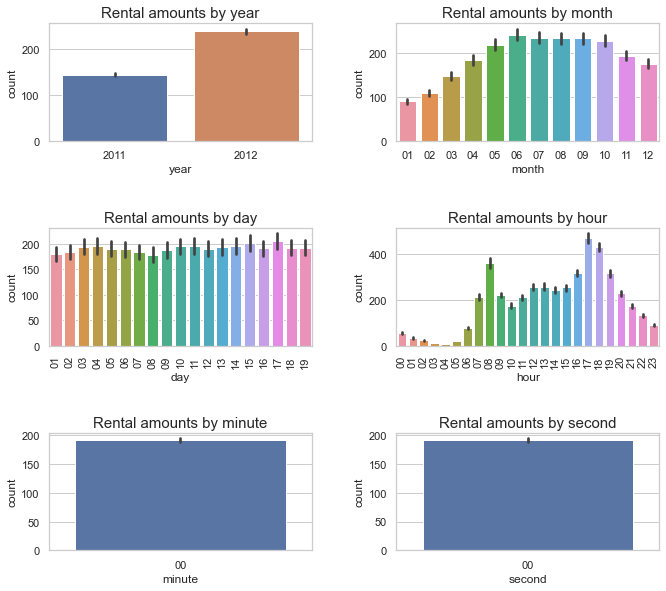

In [37]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

분석결과 : 
- 3번그래프 - day피쳐 제거
- 5,6번 그래프 - minute,second 피쳐 제거 

#### c) 박스플롯 
-------------------------

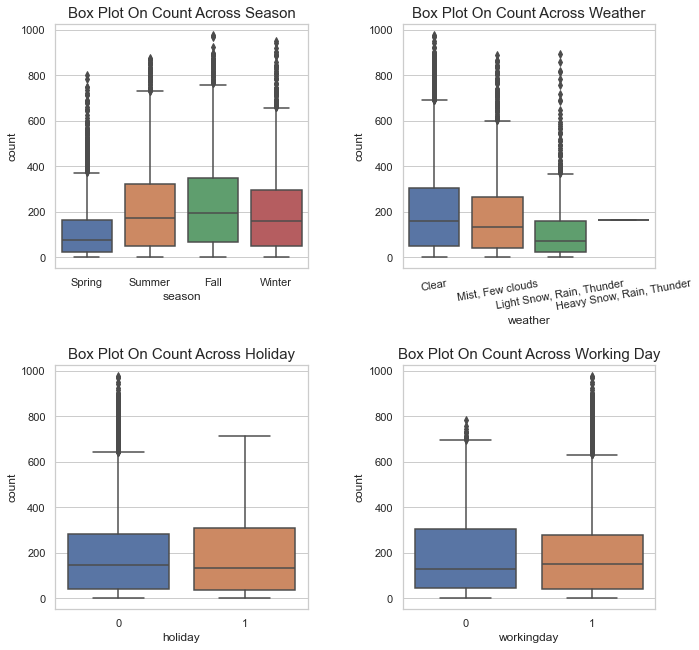

In [38]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전

#### d) 포인트 플롯
-------------------------

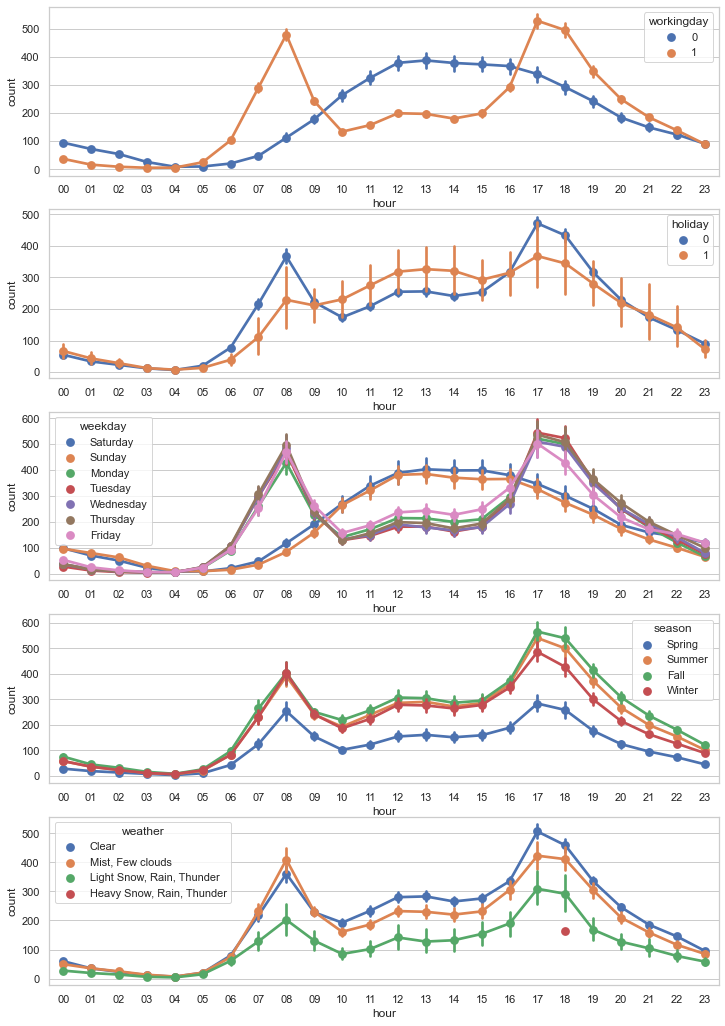

In [39]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);


분석결과 : 
-  5번 그래프의 whether가 4인 Heavy Snow,Rain,Thunder등의 이상치 발견
-  성능 개선을 위해 이상치가 있는 데이터를 제거

#### e) 회귀선을포함한 산점도 그래프
-------------------------

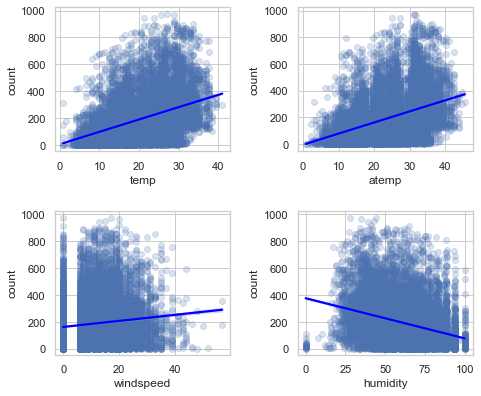

In [40]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

분석결과 : 
-  3번 그래프의 바람이 강할수록 대여수가 많음 (뭔가 이상함)
-  알고보니 windspeed에 결측치가 많음
-  windspeed 컬럼(피쳐) 제거

#### f) 히트맵
-------------------------

수행사항 : 수치형 데이터의 피쳐간 상관계수를 계산

In [41]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


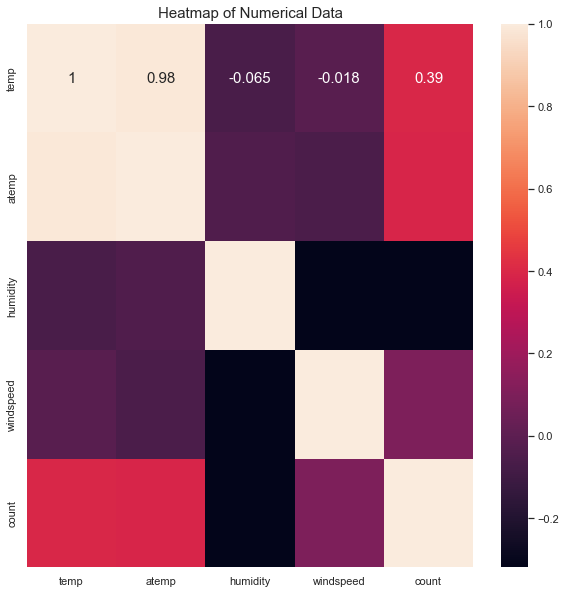

In [42]:
# 피처 간 상관관계 매트릭스
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

분석결과 : 
- windspeed 와 count 의 상관관계가 매우 약함.
- 성능개선을 위해 windspeed컬럼(피쳐) 제거

### 6.3.5 분석정리
----------------------


<br><img src="./image/ch6_help_img.png" width="720">

<section>
    <legend style="color : skyblue;  font-weight:bolder">
        1. 타깃값 변환
    </legend>    
    <p>
        🟩 정규분포에 가깝게 처리
        <br> 🔸 count를 로그변환(분포도 확인결과 타깃값인 count 가 0근처로 치우쳐 있으므로)
        <br> 🔸 마지막에는 다시 지수 변환하여 기존의 count로 복원
    </p>
</section>

<section>
    <legend style="color : gold;  font-weight:bolder">
       1. 파생피쳐 추가
    </legend>    
    <p>
        🟩 여러 정보의 혼합체 분해후 컬럼(피쳐)추가
        <br> 🔸 여기선 datetime을 분해
        <br> 🔸 datetime에서 year,month,day,hour,minute,second를 추가
        <br> 🔸 요일(weekday)피쳐 추가
    </p>
</section>

<section>
    <legend style="color : crimson;  font-weight:bolder">
        1. 피쳐제거
    </legend>    
    <p>
        🟩 의미없는 피쳐 제거
        <br> 🔸 casual,registered 피쳐제거(test.csv에 없는 컬럼)
        <br> 🔸 datetime 피쳐제거(index역할만 하므로 필요없음)        
        <br> 🔸 date 피쳐 제거(year,month,day피쳐와 내용이 같으므로 굳이 필요 없음 )
        <br> 🔸 month 피쳐제거(season의 세부항목으로도 확인가능)
        <br> 🔸 month 피쳐제거(season의 세부분류로도 확인가능)
        <br> 🔸 day 피쳐제거(막대그래프 확인결과 쓸모없음이 확인됨)
        <br> 🔸 minute,second 피쳐제거(막대그래프 확인결과 아무런 정보도 담겨있지 않았음)
        <br> 🔸 windspeed 피쳐제거(산점도와 히트맵 확인결과 windspeed 피쳐는 결측값이 많고, count와 상관관계가 매우 낮았음을 확인함)
    </p>
</section>

<section>
    <legend style="color : mediumspringgreen;  font-weight:bolder">
        1. 이상치 제거
    </legend>    
    <p>
        whether가 4인 데이터는 특수한 날씨임과 동시에 이상치로 판단할수 있으므로 컬럼(피쳐)제거
</section>



### 6.3.6 모델링 전략
----------------------


* 베이스라인 모델 : LinearRegression
<p>

* 성능개선
    + 피쳐엔지니어링
    + 하이퍼파라미터 최적화
<p>

* 기타  : 타깃값이 count가 아닌 log(count)
<p>    

## 6.4 베이스라인 모델링
----------------------

베이스라인모델 : 사이킥런에서 제공되는 기본 선형회귀모델 사용

🔻베이스라인 모델 전체 프로세스
<br>
<br><img src="./image/ch6_process_baseline-modeling.png" width="720">

### 6.4.1 피쳐 엔지니어링
----------------------

### 0) 데이터 로드

In [54]:
import numpy as np
import pandas as pd

data_path = './Chapter6_data/'

train = pd.read_csv(data_path+'train.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sampleSubmission.csv')

#### 1) 이상치 제거
----------------------


In [55]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

#### 2) 데이터 합치기
----------------------


In [56]:
all_data_temp = pd.concat([train, test])
all_data_temp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [57]:
all_data = pd.concat([train, test], ignore_index=True)
all_data


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


#### 3) 파생피처(변수)추가
----------------------


In [58]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

#### 4) 필요없는 피처 제거
----------------------


In [59]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'month', 'windspeed']

all_data = all_data.drop(drop_features, axis=1)


#### 5) 데이터 나누기
----------------------


In [60]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

결과

In [61]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


### 6.4.2 평가지표 계산함수 작성
----------------------

평가지표 : RMSLE 사용

In [62]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output


### 6.4.3 모델훈련
----------------------


모델생성

In [63]:
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()

모델훈련

In [64]:
log_y = np.log(y)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # 모델 훈련

LinearRegression()

선형회귀 정리 : 
- 훈련 : 피쳐(독립변수) 와 타깃값(종속변수)이 주어질때 최적의 가중치(계수)를 찾는것
- 예측 : 최적의 가중치를 알고있는 상태에서 새로운 독립변수(데이터)가 주어졌을때(예를들어 날짜를 미래로 바꾸고 예측) 타깃값(종속변수)를 추정하는 과정

### 6.4.4 모델성능 검증
----------------------

In [66]:
preds = linear_reg_model.predict(X_train)

In [68]:
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0205


### 6.4.5 예측 및 결과 검증
----------------------

베이스라인 예측결과 제출시 주의사항

1. 테스트데이터로 예측결과 이용
2. 예측값 count에 지수변환 필요 log(count) -> count

In [69]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds)    # 지수변환
submission.to_csv('submission.csv', index=False) # 파일로 저장

In [71]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.362398
1,2011-01-20 01:00:00,13.601789
2,2011-01-20 02:00:00,15.084417
3,2011-01-20 03:00:00,16.308758
4,2011-01-20 04:00:00,18.086453


## 6.5 성능개선 I (릿지회귀 모델)
----------------------

릿지회귀 모델 :  `L2 규제`를 적용한 선형회귀모델
<br>
규제 : 모델이 훈련데이터를 과대적합 하지 않게 해주는 방법
<br>

<span style="color:green; font-weight:bold">장점  : 단순 베이스모델 보다는 과대적합이 적다.<span>
<br>
<span style="color:crimson; font-weight:bold">단점  : 성능이 구리다.<span>

🔻베이스라인 모델 과 모델성능 개선 프로세스 비교
<br>
<br><img src="./image/ch6_compare_to_baseline_with_sklearn.png" width="720">

### 6.5.1 하이퍼파라미터 최적화(모델훈련)
----------------------

최적화 방법 : 그리드 서치 기법 사용

#### 1) 모델생성
----------------------------------

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

#### 2) 그리드 서치 객체 생성
----------------------------------

In [73]:
# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer,    # 평가지표
                                      cv=5)                    # 교차검증 분할 수


#### 3) 그리드 서치 수행
----------------------------------

In [74]:
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [75]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


### 6.5.2 성능검증
----------------------

In [76]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train) 

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') 

릿지 회귀 RMSLE 값 : 1.0205


<p style="color:green;font-weight:bolder">결론 : 릿지회귀 모델의 RMSLE는 1.0205로, 일반 선형회귀 모델의 RMSLE와 성능의 차이가 없다.</p>
<p style="color:cyan;font-weight:bolder">리뷰 : 릿지회귀 모델 성능 나쁘다.</p>

~~이걸 굳이 사용할 필요는 없을듯?~~




## 6.6 성능개선 II  (라쏘회귀 모델)
----------------------

라쏘회귀 모델 :  이것도 `L2 규제`를 적용한 선형회귀모델
<br>
규제 : 모델이 훈련데이터를 과대적합 하지 않게 해주는 방법
<br>

<span style="color:green; font-weight:bold">장점  : 단순 베이스모델 보다는 과대적합이 적다.<span>
<br>
<span style="color:crimson; font-weight:bold">단점  : 성능이 구리다.<span>
<br>
<span style="color:yellow; font-weight:bold">주의  : 모델 만들거면, 적어도 릿지나 라쏘보다는 성능이 나와야 한다.<span>

### 6.6.1 하이퍼파라미터 최적화(모델훈련)
----------------------

In [77]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


### 6.6.2 성능검증
----------------------

In [78]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')


라쏘 회귀 RMSLE 값 : 1.0205


<p style="color:green;font-weight:bolder">결론 : 라쏘 모델의 RMSLE는 1.0205로, 일반 선형회귀 모델의 RMSLE와 성능의 차이가 없다.</p>
<p style="color:cyan;font-weight:bolder">리뷰 : 라쏘회귀 모델도 역시 성능이 나쁘기는 마찬가지이다.</p>

~~릿지나 라쏘나 하나같이 성능이.... 이것도 굳이 사용할 일이 없을듯?~~




## 6.7 성능개선 III  (랜덤포레스트 회귀 모델)
----------------------

랜덤 포레스트 회귀모델 :  랜덤하게 샘플링한 모델 n개를 각각 훈련하여 결과를 평균하는 방법
<br>

<span style="color:green; font-weight:bold">장점  : 베이스라인,릿지 라쏘보다 RMSLE 점수가 월등히 좋다(값이 낮을수록 성능이 좋음)<span>
<br>
<span style="color:crimson; font-weight:bold">단점  : 앞의 베이스라인, 릿지,라쏘 보다 그리드 서치시 시간이 오래걸린다. (1분40초쯤 걸림)<span>
<br>

### 6.7.1 하이퍼파라미터 최적화(모델훈련)
----------------------

In [80]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)


최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


### 6.7.2 성능검증
----------------------

In [81]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')


랜덤 포레스트 회귀 RMSLE 값 : 0.1127


<p style="color:green;font-weight:bolder">결론 : 랜덤포레스트의 RMSLE는 0.1126으로, 일반 선형회귀 모델의 RMSLE(1.0205)보다 성능이 우수하다.</p>
<p style="color:cyan;font-weight:bolder">리뷰 : 베이스라인,릿지,라쏘,랜덤포레스트 네개의 모델중에서 라면 성능이 탑이다.</p>




### 6.7.3 예측 및 결과 제출
----------------------

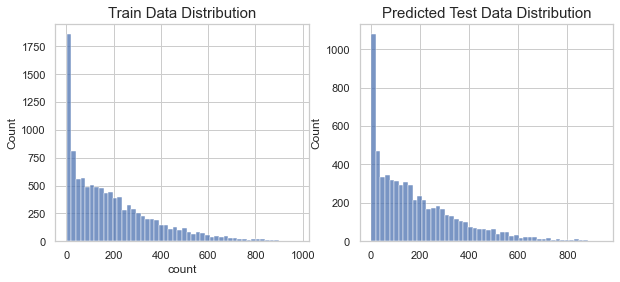

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

위 그래프를 보면 훈련 데이터 타깃값과 테스트데이터 타깃값의 데이터 분포가 비슷한것을 확인 할수 있음

예측결과 저장

In [2]:
submission['count'] = np.exp(randomforest_preds) # 지수변환( 지금까지 log(count)였으므로 원래대로 count로 복구시킴 )
submission.to_csv('./Chapter6_data/submission.csv', index=False)

NameError: name 'np' is not defined

## 6.8 핵심요약
----------------------

1 머신러닝 프로세스
<br>
<br><img src="./image/ch6_머신러닝흐름도.png" width="720">
+ 문제이해 : 문제유형을 파악하고 평가지표를 확인
+ 탐색적 데이터분석 : 데이터 시각화를 통해 데이터를 분석한후, 피처엔지니어링과 모델링 전략을 수립
+ 기본모델제작 : 문제해결에 적합한 모델을 생성, 유사한 문제를 풀때 업계에서 흔히 쓰는 모델이나 직관적으로 떠오르는 모델을 선택
+ 성능개선 : 베이스라인보다 나은 성능을 목표로 최적화 진행

2 총정리 :

1. 타깃값변환
    + 타깃값이 정규분포에 가까울수록 회귀문제의 성능이 좋다.
    + 한쪽으로 치우친 타깃값은 로그변환하면 정규분포에 가까워짐 , 훈련후 결과값을 지수변환하여 원래 타깃형태로 복원
<p>

2. 이상치제거
   + 훈련데이터에서 이상치 제서시 성능이 향상될수있음
<p>
  

3. 파생피쳐추가
   + 기존피쳐를 분해,조합하여 새로운 피쳐 생성가능
<p>


4. 파생피쳐제거
   + 불필요한 피쳐 제거시 훈련속도 및 성능 개선
<p>



5. 선형회귀,릿지,라쏘 모델
   + 대표 회귀모델이나, 너무 기본이라 성능이 나쁨
<p>


6. 랜덤 포레스트회귀
   + 여러모델을 묶어사용, 대체로 간단하고 성능이 나쁘지않음
<p>


7. 그리드서치
   + 교차검증으로 최적의 하이퍼 파라미터를 찾아주는 기법
<p>
